In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import image

import seaborn as sns
import matplotlib.pyplot as plt

from skimage.transform import resize
from skimage.io import imread
from skimage.color import rgb2gray

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



sns.set_palette('Paired')
sns.set_style("whitegrid")

In [2]:
positive_class_path = 'malaria/uab curated/1'
negative_class_path = 'malaria/uab curated/0'
positive_class_path2 = 'malaria/uah/1/'
negative_class_path2 = 'malaria/uah/1/'


### Step 1 : Data Extraction / Cleaning / Aggregation

In this step, data is extracted from each source, cleaned, resized, flattened and finally combined with all the sources to form an aggreagated dataframe that consists of all the classes.

In [3]:
def file_append(class_path):    
    image_array = []    
    curr_path = os.path.join(os.getcwd(),class_path)
    cnt = 0
    file_list = [k for k in os.listdir(curr_path) if '.png'  in k]
    for x in file_list:
        
        img_path = os.path.join(curr_path,x)

        img = imread(img_path)
#         img = rgb2gray(img)
        img = resize(img,(60,60,3))     ## Will need to change this resize parameter
        img = img.flatten()
        image_array.append(img)
        
    return image_array
    

# pos_imgs_curated = file_append(positive_class_path)
# pos_imgs_uah = file_append(positive_class_path2)

# positive_df_curated  = pd.DataFrame(pos_imgs_curated)
# positive_df_uah = pd.DataFrame(pos_imgs_uah)
# positive_df = pd.concat([positive_df_curated,positive_df_uah],ignore_index=True)
# positive_df['y'] = 1

# neg_imgs_curated = file_append(negative_class_path)
# neg_df_cur  = pd.DataFrame(neg_imgs_curated)
# neg_imgs_uah = file_append(negative_class_path2)
# neg_df_uah  = pd.DataFrame(neg_imgs_uah)
# neg_df = pd.concat([neg_df_cur,neg_df_uah],ignore_index=True)
# neg_df['y'] = 0

# # plt.imshow(np.reshape(pos_imgs[2],(40,40,3)))
# df = pd.concat([positive_df,neg_df,],ignore_index=True)
# df = df.sample(frac=1, random_state=42).reset_index(drop=True)


class1_img = file_append(positive_class_path)
class2_img = file_append(negative_class_path)

In [4]:
df1 = pd.DataFrame(class1_img)
df1['y']  = 1
df2 = pd.DataFrame(class2_img)
df2['y']  = 0

df = pd.concat([df1,df2],ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [31]:
df

,0,1,2,3,4,5,6,7,8,9,...,10791,10792,10793,10794,10795,10796,10797,10798,10799,y
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.773284,0.651716,0.671324,0.720915,0.599346,0.618954,0.720044,0.598475,0.618083,0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2560,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
2561,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0
2562,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.750517,0.652097,0.667974,0.730474,0.632435,0.648121,0.726334,0.628295,0.643981,0
2563,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0


## Step 2 : EDA of variable

Text(0.5, 1.0, 'Class Wise Distribution of data')

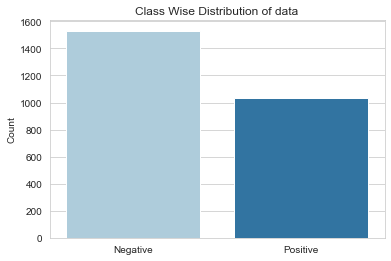

In [5]:
sns.barplot(x =['Negative','Positive'],y = df['y'].value_counts())
plt.ylabel('Count')
plt.title('Class Wise Distribution of data')

## Step 3 : Splitting entire dataset into train and test sets

In [6]:
X,y = df[df.columns[:-1]],df['y']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=121)



## Step 4 : Data Preprocessing pipeline for scaling and dimensionality reduction

In [7]:
data_pipe = Pipeline([('scaler', StandardScaler()), ('pca',PCA(n_components=0.9))])
data_pipe.fit(X_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=0.9))])

In [8]:
X_train = data_pipe.transform(X_train)
X_test = data_pipe.transform(X_test)

print(f"Original Data dimension: {df.shape[1]} features")
print(f"After PCA Data dimension: {X_train.shape[1]} features")

Original Data dimension: 10801 features
After PCA Data dimension: 135 features


Text(0.5, 1.0, 'Variance Ratio for top 10 Principal Components')

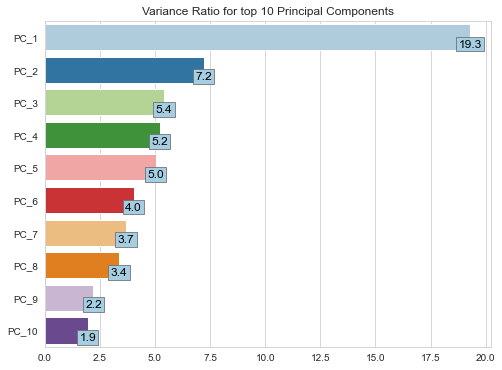

In [9]:
top10_var = [x*100 for x in data_pipe.named_steps['pca'].explained_variance_ratio_[:10]]
PC_labels = ['PC_'+str(x+1) for x in range(len(top10_var)) ]

plt.figure(figsize=(8,6))
plt.title("Variance Percentage for top 10 Principal Components")

bar = sns.barplot(x = top10_var,y = PC_labels)
for p in bar.patches:
    x = p.get_width()
    y = p.get_y()
    bar.annotate(format(x,'.1f'),(x,y),ha = 'center', va = 'center',size=12,color='black',xytext = (0, -20), textcoords = 'offset points',bbox = dict(boxstyle = 'square, pad = 0.2', lw = 0.8, ec = '#6e6e6e'))
#     print(p.get_width())
    
plt.title("Variance Ratio for top 10 Principal Components")



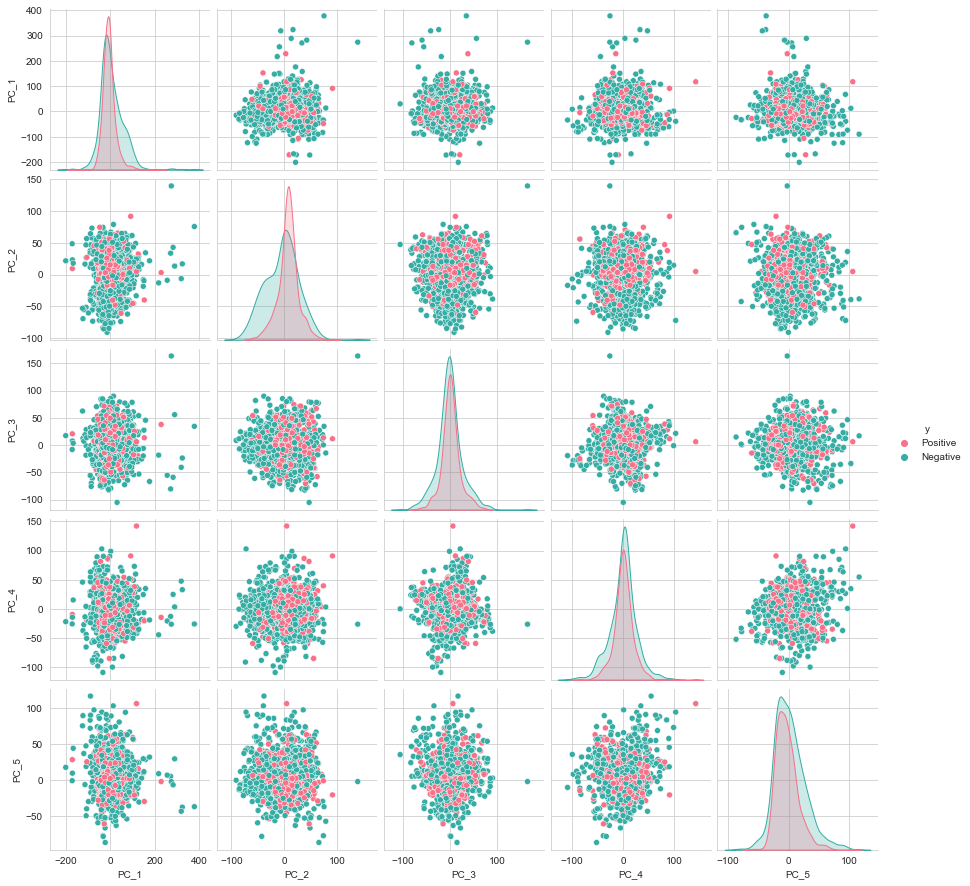

In [10]:
scatter_plots = X_train[:,:5]
data_cols = ['PC_'+str(x+1) for x in range(scatter_plots.shape[1]) ]
scatter_df = pd.DataFrame(scatter_plots,columns=data_cols)
scatter_df['y'] = y_train.reset_index(drop=True)

label_map = {0:'Negative',1:'Positive'}
scatter_df['y'] = scatter_df['y'].map(label_map)

sns.pairplot(scatter_df,hue="y",palette="husl",)




## Step 5 : Data Modelling

In [27]:
#Base function for models

def train_model(model,search_grid):
    cv = KFold(n_splits=10)
    grid_search = GridSearchCV(estimator=model, param_grid=search_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
    grid_result = grid_search.fit(X_train,y_train)
    
    return grid_result

def scatter_plots(score_array,title):
    sns.set_palette('CMRmap')
    lr_scores = [max(score_array.cv_results_['split'+str(i)+'_test_score']) for i in range(0,10)]
    sns.lineplot(range(1,11),lr_scores)
    j = plt.scatter(range(1,11),lr_scores)
    
    plt.xlabel('Cross Validation Steps')
    plt.ylabel('Model Accuracy')
    plt.title(f'Cross Validation Accuracies for {title}',size=15)

    for i,j in enumerate(lr_scores):
        if j == max(lr_scores):
            plt.scatter(i+1,j,c='red',marker='o',s=200)
            plt.annotate(format(j,'.3f'),(i+1,j),size=15)
            
def cf_plot(score_array,title):
    plt.figure(figsize=(9,7))
    cf_matrix = confusion_matrix(y_test,y_pred=score_array.predict(X_test))
    sns.heatmap(cf_matrix, annot=True,fmt='g', cmap='Blues',annot_kws={"size":15})
    plt.xlabel('Predicted Label',size=15)
    plt.ylabel('Actual Label',size=15)
    plt.title(f'Confusion Matrix for {title}',size=15)
    print(classification_report(y_test,y_pred=score_array.predict(X_test)))

In [28]:
svm_model = SVC()
c_ = [0.5,1,2,5,10]
kernel = ['rbf','poly']

search_parameters = dict()
search_parameters['C'] = c_
search_parameters['kernel'] = kernel

svm_grid_result = train_model(svm_model,search_parameters)
svm_grid_result.best_params_

{'C': 5, 'kernel': 'rbf'}

In [29]:
svm_grid_result.score(X_test,y_test)

0.9668615984405458

/Users/gaurav/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


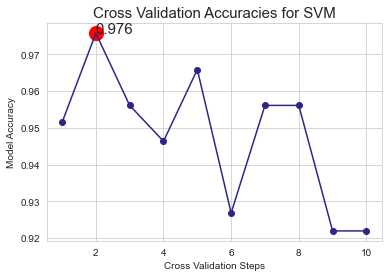

In [14]:
scatter_plots(svm_grid_result,'SVM')

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       299
           1       0.98      0.94      0.96       214

    accuracy                           0.97       513
   macro avg       0.97      0.96      0.97       513
weighted avg       0.97      0.97      0.97       513



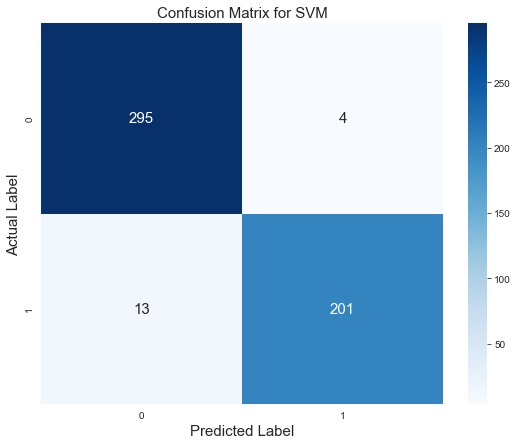

In [30]:
cf_plot(svm_grid_result,'SVM')